In [1]:
import swan_vis as swan
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load SwanGraph into Python
We have a SwanGraph object constructed from C2C12 myoblasts and 3-day differentiated myotubes. Bulk long-read RNA-seq was performed using polyA primers and PacBio sequencing. To quantify transcript expression, reads were mapped to the mouse genome using Minimap2, then the reads were cleaned and processed with TranscriptClean and [TALON](https://github.com/mortazavilab/TALON). 

In short, BAM files were downloaded from [this ENCODE data cart](https://www.encodeproject.org/carts/c2c12_bulk_pb/) and pre-processed with the walkthrough described [here](https://freese.gitbook.io/swan/tutorials/data_processing).

We will use [Swan](https://freese.gitbook.io/swan/) to analyze and visualize the C2C12 long-read transcriptome.

In [2]:
# load up a saved SwanGraph from a pickle file
sg = swan.read('../swan_data/swan.p')

Read in graph from ../swan_data/swan.p


In [3]:
# "sg" is an object with class and object attributes
# to view the metadata (pandas dataframe, like an R dataframe) associated with the swangraph, check the adata.obs attribute

In [4]:
sg.adata.obs

,dataset,timepoint,replicate
index,,,
ENCFF202MCY,ENCFF202MCY,72hr,R1
ENCFF396UFT,ENCFF396UFT,72hr,R2
ENCFF408MUF,ENCFF408MUF,0hr,R2
ENCFF652XIT,ENCFF652XIT,0hr,R1


In [5]:
type(sg.adata.obs)

pandas.core.frame.DataFrame

In [6]:
# the sg object itself is its own special type
type(sg)

swan_vis.swangraph.SwanGraph

## Visualize transcript models for a gene of interest

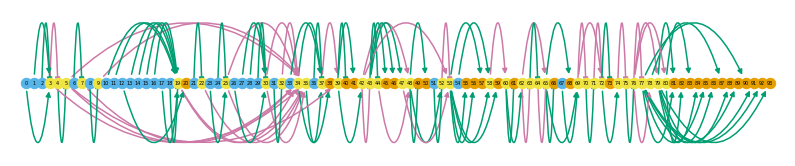

In [7]:
# plot a gene summary graph for the given gene
sg.plot_graph("Mef2c")

# Differential gene expression and differential transcript expression
## Questions
1. What is the difference between a gene and a transcript?
2. What eukaryotic process produces different transcript isoforms?

In [8]:
# deg - differential gene expression
degs = sg.adata.uns["deg_timepoint_0hr_72hr"] # Differential gene expression ("DEG") results stored here
degs.head(5)


,gid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gname
19364,ENSMUSG00000068327.5,0.0,0.0,-297.776029,0.546721,False,6.023196e-01,-297.776029,2.222759e-162,0.000000,Tlx2
32331,ENSMUSG00000092819.1,0.0,0.0,-297.776029,0.765519,False,8.658804e-05,-297.776029,2.222759e-162,-2.393727,Gm23639
10830,ENSMUSG00000037747.9,0.0,0.0,-297.776029,0.546995,False,1.841082e-10,-297.776029,2.222759e-162,-2.853563,Phyhipl
31987,ENSMUSG00000092335.1,0.0,0.0,-297.776029,0.218798,False,4.175245e-02,-297.776029,2.222759e-162,0.000000,Zfp977
2240,ENSMUSG00000019979.12,0.0,0.0,-297.776029,0.656120,False,3.873635e-06,-297.776029,2.222759e-162,-2.338283,Apaf1


In [9]:
# det - differential gene expression
test = sg.adata.uns["det_timepoint_0hr_72hr"] # Differential transcript expression ("DET") results stored here
test.head(5)

,tid,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll,gid,gname
47581,ENSMUST00000133842.1,0.0,0.0,-297.776029,0.218661,False,1.142108e-02,-297.776029,2.222759e-162,-1.446915,ENSMUSG00000038900.17,Rpl12
85506,ENSMUST00000178545.2,0.0,0.0,-297.776029,0.109399,False,3.338657e-03,-297.776029,2.222759e-162,-0.959681,ENSMUSG00000095407.2,Tmem200c
85485,ENSMUST00000178522.2,0.0,0.0,-297.776029,0.109331,False,5.204170e-15,-297.776029,2.222759e-162,0.000000,ENSMUSG00000009035.15,Tmem184b
11079,ENSMUST00000053079.12,0.0,0.0,-297.776029,1.312241,False,1.161889e-01,-297.776029,2.222759e-162,0.000000,ENSMUSG00000009073.16,Nf2
85484,ENSMUST00000178520.1,0.0,0.0,-297.776029,0.109331,False,5.204170e-15,-297.776029,2.222759e-162,0.000000,ENSMUSG00000095453.1,n-R5s149


In [10]:
# die_iso - differential isoform expression
test = sg.adata.uns["die_iso_timepoint_0hr_72hr"] # Differential isoform expression ("DIE") results stored here

test.sort_values(by=['dpi'], ascending=False)

,gid,p_val,dpi,adj_p_val
891,ENSMUSG00000020836.15,1.947155e-65,97.953918,2.032905e-63
825,ENSMUSG00000020439.17,2.422836e-81,97.497833,3.208189e-79
2936,ENSMUSG00000036918.16,3.341302e-06,95.452316,2.897752e-05
4946,ENSMUSG00000033060.15,1.606560e-25,94.938362,5.222765e-24
3576,ENSMUSG00000036879.15,2.569213e-42,93.635071,1.549806e-40
...,...,...,...,...
713,ENSMUSG00000019804.12,1.000000e+00,0.019366,1.000000e+00
3546,ENSMUSG00000043702.9,1.000000e+00,0.007408,1.000000e+00
763,ENSMUSG00000020116.7,1.000000e+00,0.006302,1.000000e+00
4785,ENSMUSG00000041126.16,1.000000e+00,0.003403,1.000000e+00


In [11]:
# die_iso - differential isoform expression
test = sg.adata.uns["die_iso_timepoint_0hr_72hr"] # Differential isoform expression ("DIE") results stored here

test = test.merge(sg.t_df[['gid', 'gname']], how='left', on='gid')
test = test.loc[test.adj_p_val <= 0.05]
test = test.sort_values(by='dpi', ascending=False)
test.drop_duplicates(inplace=True)
test.head(10)

,gid,p_val,dpi,adj_p_val,gname
6911,ENSMUSG00000020836.15,1.947155e-65,97.953918,2.032905e-63,Coro6
6453,ENSMUSG00000020439.17,2.422836e-81,97.497833,3.208189e-79,Smtn
22614,ENSMUSG00000036918.16,3.341302e-06,95.452316,2.897752e-05,Ttc7
39052,ENSMUSG00000033060.15,1.606560e-25,94.938362,5.222765e-24,Lmo7
27578,ENSMUSG00000036879.15,2.569213e-42,93.635071,1.549806e-40,Phkb
12608,ENSMUSG00000026253.14,4.357568e-87,92.196701,6.759210e-85,Chrng
29891,ENSMUSG00000044813.15,3.027641e-33,91.546761,1.245232e-31,Shb
36961,ENSMUSG00000035900.18,2.560713e-14,90.443451,4.793832e-13,Gramd4
39889,ENSMUSG00000030530.15,5.562945e-08,89.651779,6.101258e-07,Furin
24418,ENSMUSG00000038170.15,5.226496e-30,89.272077,1.956872e-28,Pde4dip


In [12]:
# generate a report for the given gene
# save it with the given filepath prefix
# include differential transcript expression test significance results
# (defaults to significance threshold q >= 0.05)
# display the novelty category associated with the transcript
# display novel splice sites and junctions
#     as outlined nodes and dashed edges respectively
sg.gen_report('Mef2c',
              prefix='../swan_data/figures/mef2c_c2c12',
              novelty=True,
              indicate_novel=True)


Plotting transcripts for ENSMUSG00000005583.16
Saving transcript path graph for ENSMUST00000199450.4 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000199450.4_path.png
Saving transcript path graph for TALONT000362201 as ../swan_data/figures/mef2c_c2c12_novel_TALONT000362201_path.png
Saving transcript path graph for ENSMUST00000198199.4 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000198199.4_path.png
Saving transcript path graph for ENSMUST00000005722.13 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000005722.13_path.png
Saving transcript path graph for ENSMUST00000196832.1 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000196832.1_path.png
Saving transcript path graph for ENSMUST00000199432.4 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000199432.4_path.png
Saving transcript path graph for ENSMUST00000198217.4 as ../swan_data/figures/mef2c_c2c12_novel_ENSMUST00000198217.4_path.png
Generating report for ENSMUSG00000005583.16


In [13]:
sg.gen_report('Coro6',
              prefix='../swan_data/figures/coro6_c2c12',
              novelty=True,
              layer='pi',
              cmap='magma',
              indicate_novel=True,
              transcript_name=True)


Plotting transcripts for ENSMUSG00000020836.15
Saving transcript path graph for TALONT000535409 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535409_path.png
Saving transcript path graph for ENSMUST00000102493.7 as ../swan_data/figures/coro6_c2c12_novel_ENSMUST00000102493.7_path.png
Saving transcript path graph for TALONT000535406 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535406_path.png
Saving transcript path graph for TALONT000535398 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535398_path.png
Saving transcript path graph for TALONT000535401 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535401_path.png
Saving transcript path graph for TALONT000535407 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535407_path.png
Saving transcript path graph for TALONT000535403 as ../swan_data/figures/coro6_c2c12_novel_TALONT000535403_path.png
Saving transcript path graph for ENSMUST00000108391.8 as ../swan_data/figures/coro6_c2c12_novel_ENSMUST00000108391.8_path.png
Gene